# Employee Attrition Analysis 

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Importing Data:</h2>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from pathlib import Path 
from plotly.offline import iplot,init_notebook_mode,plot
# from plotly.subplots import make_subplots
init_notebook_mode(connected=True)
  

%matplotlib inline
pd.set_option('display.max_columns', None)

In [3]:
hr = pd.read_csv("D:\DataScience\Internship\MeriSkill\Project-2\Project 3 - HR Analytics\Clean Data\HR-Employee-Attrition.csv")
hr.head()

,Age,Attrition,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel
0,41,Yes,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Rarely
1,49,No,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,Frequently
2,37,Yes,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Rarely
3,33,No,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,Frequently
4,27,No,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,Rarely


<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Data Informations:</h2>

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EmployeeCount             1470 non-null   int64 
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [5]:
hr.shape

(1470, 35)

In [6]:
hr.columns

Index(['Age', 'Attrition', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel'],
      dtype='object')

In [7]:
hr["Department"].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [8]:
hr["EducationField"].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [9]:
hr["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [10]:
hr["JobRole"].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [11]:
hr["MaritalStatus"].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [12]:
hr["Over18"].unique()

array(['Y'], dtype=object)

In [13]:
hr["OverTime"].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
hr["BusinessTravel"].unique()

array(['Rarely', 'Frequently', 'Non-Travel'], dtype=object)

In [15]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Text(0.5, 0, 'Data')

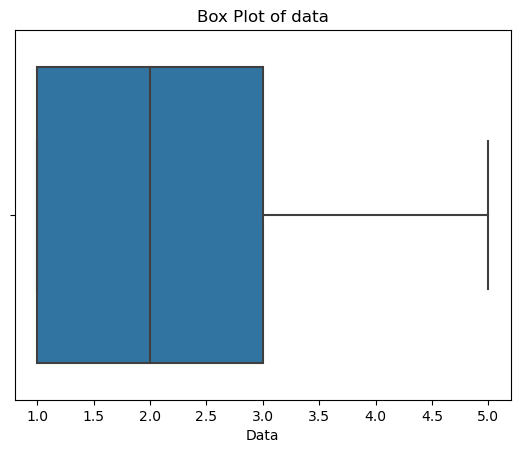

In [16]:
# Create the box plot
sns.boxplot(x=hr["JobLevel"])

# Set the title and labels
plt.title("Box Plot of data")
plt.xlabel("Data")
# plt.xlim(0, 1000)

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 32px; font-weight: bold; text-align: justify; color: #555;">EDA:</h2>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Correlation Map for Numeric Variables:</h2>

In [17]:
correlation_matrix = hr.corr()

In [18]:
filepath = Path('D:/DataScience/Internship/MeriSkill/Project-2/Project 3 - HR Analytics/Docs/correlation_matrix.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
correlation_matrix.to_csv(filepath) 

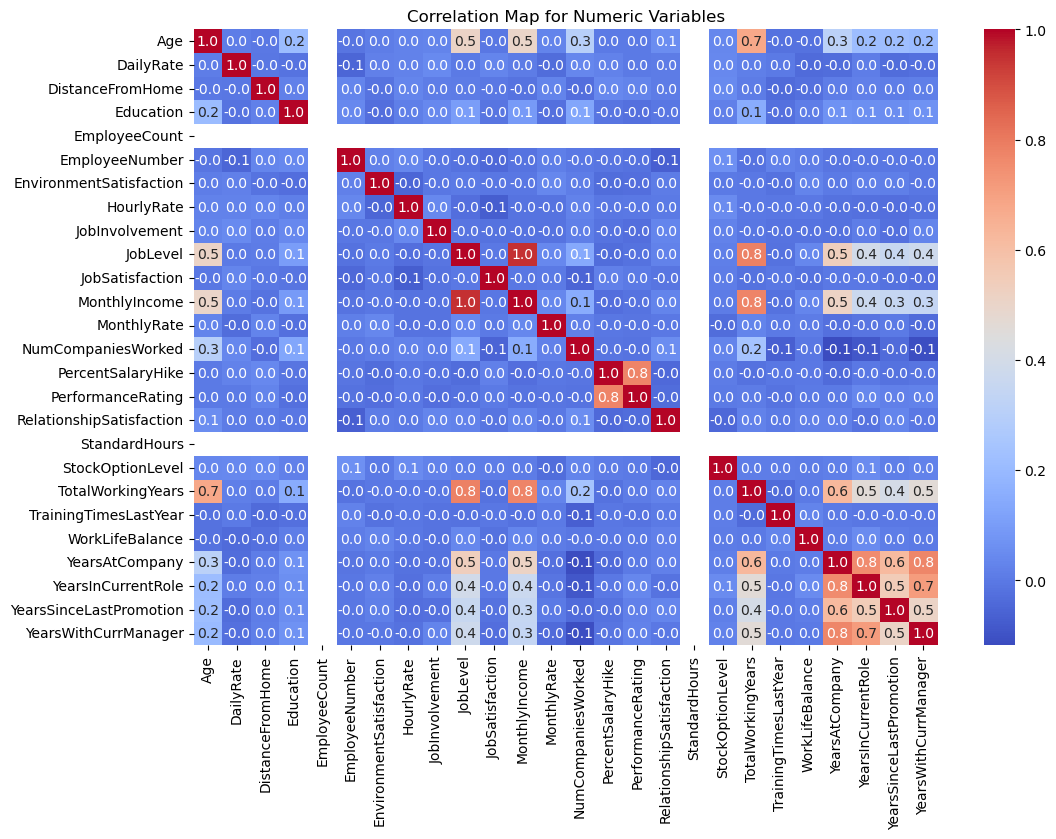

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f")
plt.title("Correlation Map for Numeric Variables")
plt.show()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Overtime Status:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>Attrition</li>
  <li>Job satisfaction</li>
</ul>

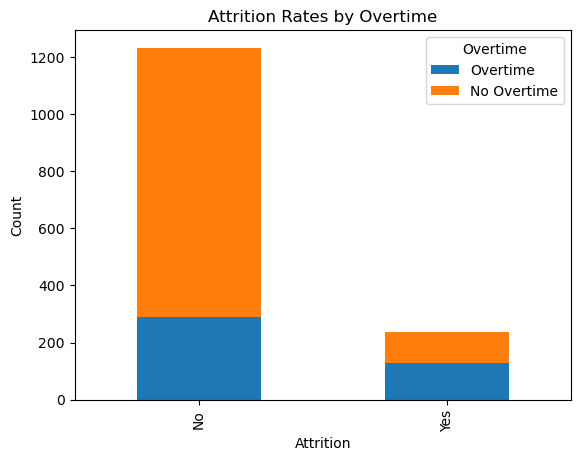

In [21]:
# Calculate attrition rates for overtime and non-overtime employees
attrition_overtime = hr[hr['OverTime'] == 'Yes']['Attrition'].value_counts()
attrition_no_overtime = hr[hr['OverTime'] == 'No']['Attrition'].value_counts()

# Create a bar chart to visualize attrition rates
attrition_rates = pd.DataFrame({'Overtime': attrition_overtime, 'No Overtime': attrition_no_overtime})
attrition_rates.plot(kind='bar', stacked=True)
plt.title('Attrition Rates by Overtime')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.legend(title='Overtime')
plt.show()


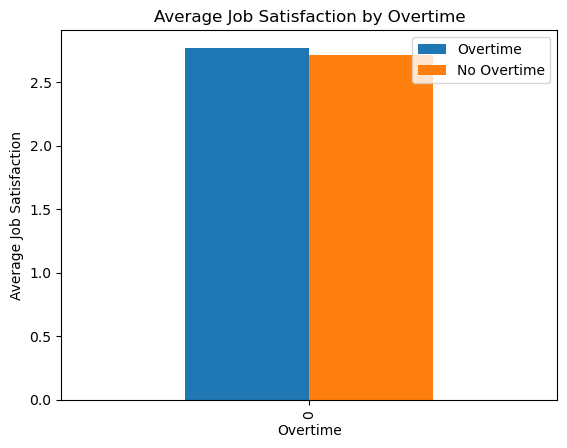

In [23]:
# Calculate average job satisfaction for overtime and non-overtime employees
avg_job_satisfaction_overtime = hr[hr['OverTime'] == 'Yes']['JobSatisfaction'].mean()
avg_job_satisfaction_no_overtime = hr[hr['OverTime'] == 'No']['JobSatisfaction'].mean()

# Create a bar chart to visualize average job satisfaction
avg_job_satisfaction = pd.DataFrame({'Overtime': avg_job_satisfaction_overtime, 'No Overtime': avg_job_satisfaction_no_overtime}, index=[0])
avg_job_satisfaction.plot(kind='bar')
plt.title('Average Job Satisfaction by Overtime')
plt.ylabel('Average Job Satisfaction')
plt.xlabel('Overtime')
plt.show()


<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Marital Status:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>% of Employees</li>
  <li>Attrition</li>
  <li>Average Monthly</li> 
</ul>

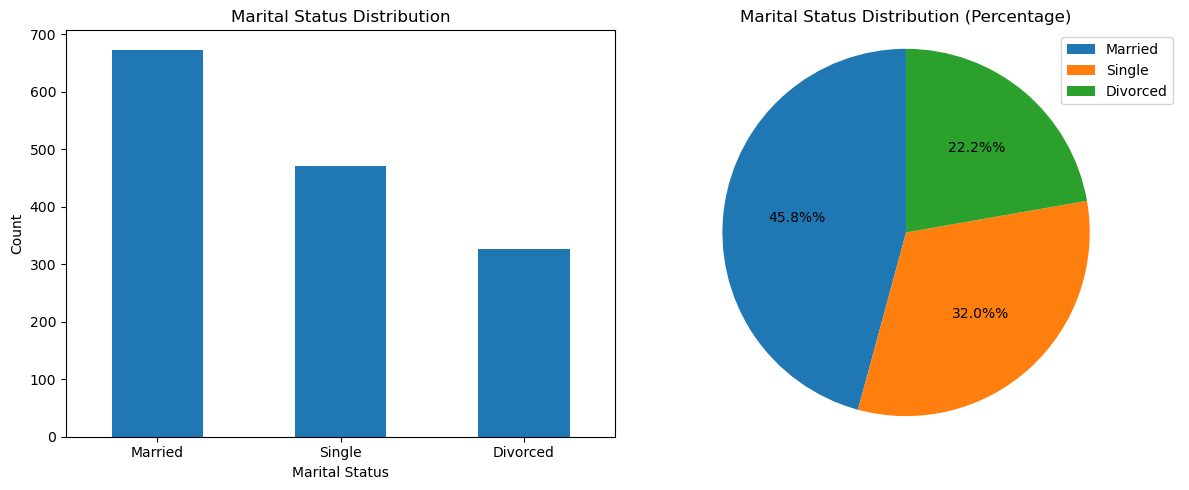

In [24]:
# Calculate the count and percentage of employees in each marital status category
marital_status_counts = hr['MaritalStatus'].value_counts()
marital_status_percentage = hr['MaritalStatus'].value_counts(normalize=True) * 100

# Create bar plots to visualize the distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
marital_status_counts.plot(kind='bar', rot=0)
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')

# Create a subplot for the pie chart
plt.subplot(1, 2, 2)
# Plot a pie chart
wedges, _, autotexts = plt.pie(marital_status_percentage, autopct='%1.1f%%', startangle=90)
# Add legends
plt.legend(marital_status_percentage.index, loc='best')
# Set title and aspect ratio
plt.title('Marital Status Distribution (Percentage)')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
# Display the pie chart
plt.tight_layout()
# Show only percentage values and add '%' symbol
for autotext in autotexts:
    autotext.set_text(f"{autotext.get_text()}%")

plt.show()


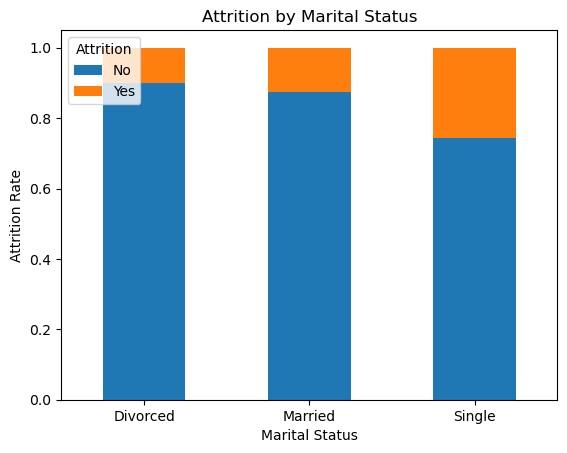

In [26]:
# Calculate attrition rates for each marital status
attrition_by_marital_status = hr.groupby('MaritalStatus')['Attrition'].value_counts(normalize=True).unstack()
attrition_by_marital_status.plot(kind='bar', stacked=True, rot=0)
plt.title('Attrition by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Attrition Rate')
plt.legend(title='Attrition', loc='upper left')
plt.show()


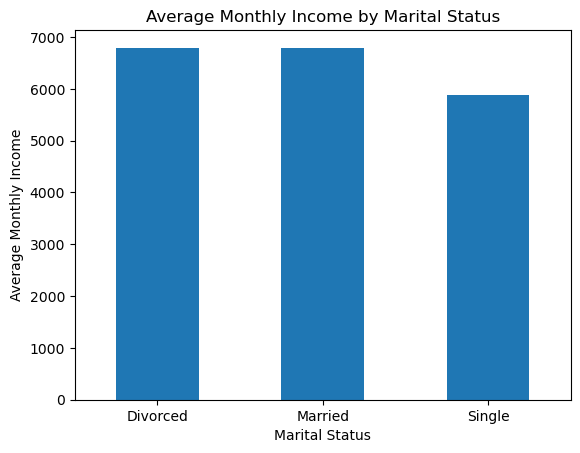

In [28]:
# Calculate average monthly income by marital status
average_income_by_marital_status = hr.groupby('MaritalStatus')['MonthlyIncome'].mean()
average_income_by_marital_status.plot(kind='bar', rot=0)
plt.title('Average Monthly Income by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Monthly Income')
plt.show()


<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Job Role Status:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>% of Employees</li>
  <li>Attrition</li>
</ul>

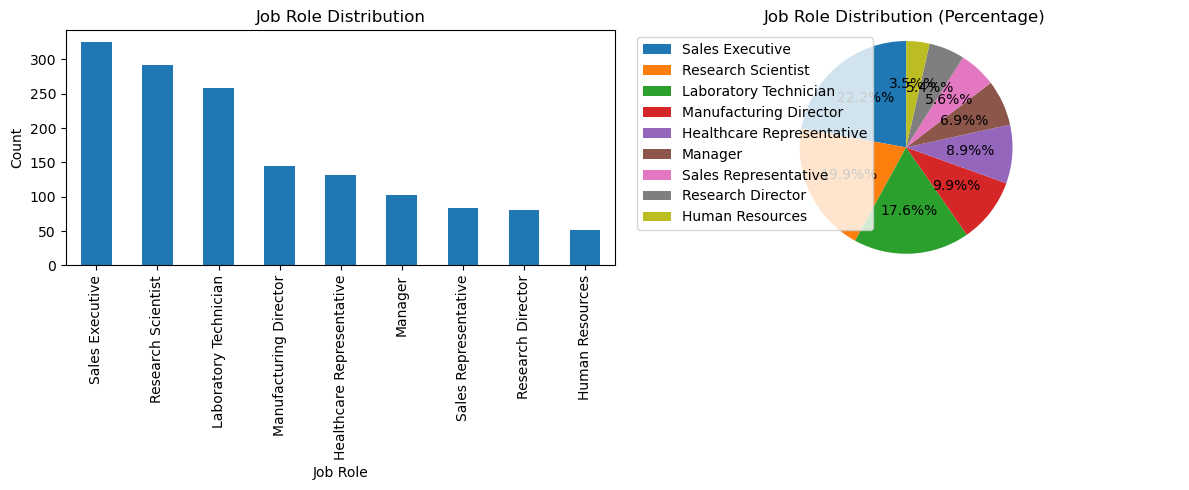

In [30]:
# Calculate the count and percentage of employees in each job role category
job_role_counts = hr['JobRole'].value_counts()
job_role_percentage = hr['JobRole'].value_counts(normalize=True) * 100

# Create bar plots to visualize the distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
job_role_counts.plot(kind='bar', rot=90)
plt.title('Job Role Distribution')
plt.xlabel('Job Role')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
# Plot a pie chart with legends
wedges, _, autotexts = plt.pie(job_role_percentage, autopct='%1.1f%%', startangle=90)
# Add legends
plt.legend(job_role_percentage.index, loc='best')
# Set title and aspect ratio
plt.title('Job Role Distribution (Percentage)')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
# Display the pie chart
plt.tight_layout()
# Show only percentage values and add '%' symbol
for autotext in autotexts:
    autotext.set_text(f"{autotext.get_text()}%")

plt.show()

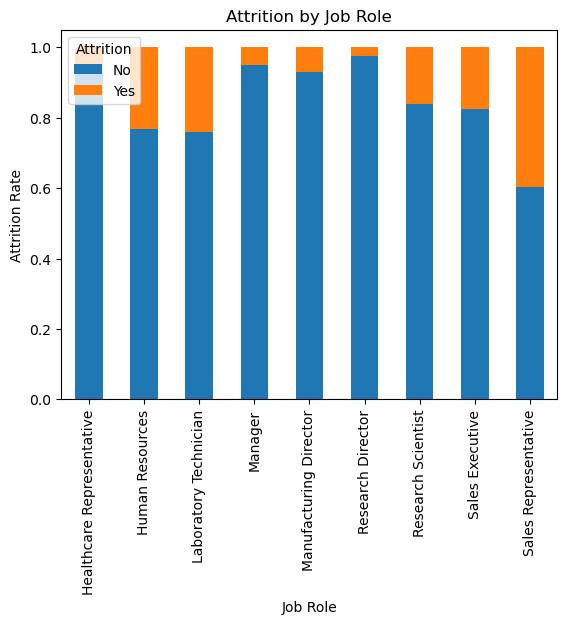

In [32]:
# Calculate attrition rates for each job role
attrition_by_job_role = hr.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack()
attrition_by_job_role.plot(kind='bar', stacked=True, rot=90)
plt.title('Attrition by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate')
plt.legend(title='Attrition', loc='upper left')
plt.show()


<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Gender Status:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>% of Employees</li>
  <li>Attrition</li>
</ul>

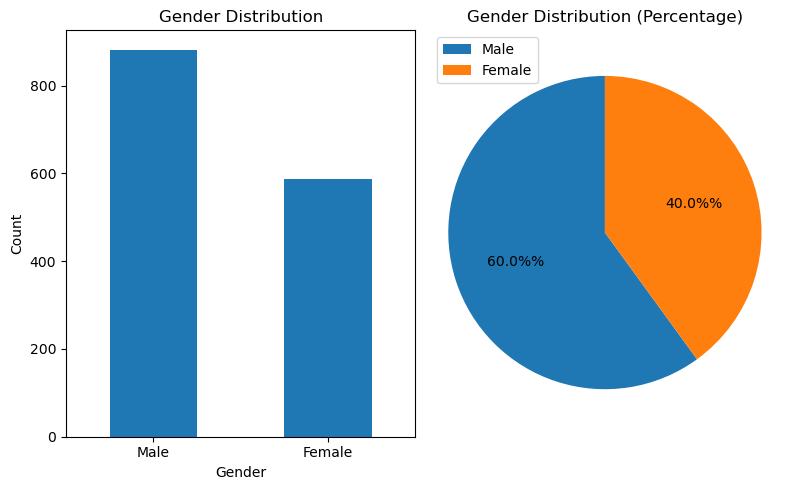

In [34]:
# Calculate the count and percentage of employees in each gender category
gender_counts = hr['Gender'].value_counts()
gender_percentage = hr['Gender'].value_counts(normalize=True) * 100

# Create a pie chart to visualize the distribution
plt.figure(figsize=(8, 5))
plt.subplot(1, 2, 1)
gender_counts.plot(kind='bar', rot=0)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
# Plot a pie chart with legends
wedges, _, autotexts = plt.pie(gender_percentage, autopct='%1.1f%%', startangle=90)
# Add legends
plt.legend(gender_percentage.index, loc='best')
# Set title and aspect ratio
plt.title('Gender Distribution (Percentage)')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle
# Display the pie chart
plt.tight_layout()

# Remove labels and show only percentage values with '%' symbol
for autotext in autotexts:
    autotext.set_text(f"{autotext.get_text()}%")

plt.show()

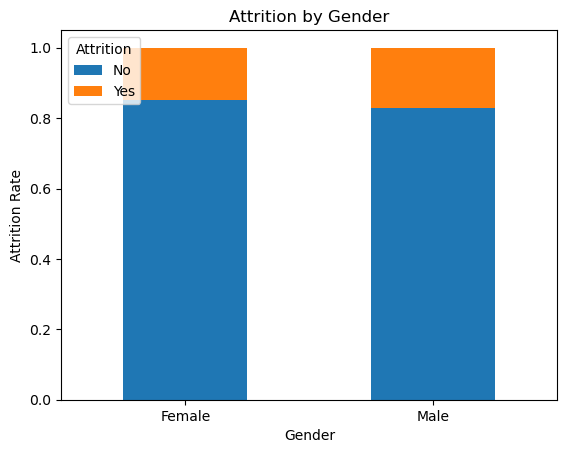

In [36]:
# Calculate attrition rates for each gender
attrition_by_gender = hr.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack()
attrition_by_gender.plot(kind='bar', stacked=True, rot=0)
plt.title('Attrition by Gender')
plt.xlabel('Gender')
plt.ylabel('Attrition Rate')
plt.legend(title='Attrition', loc='upper left')
plt.show()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Relation between Overtime and Age:</h2>

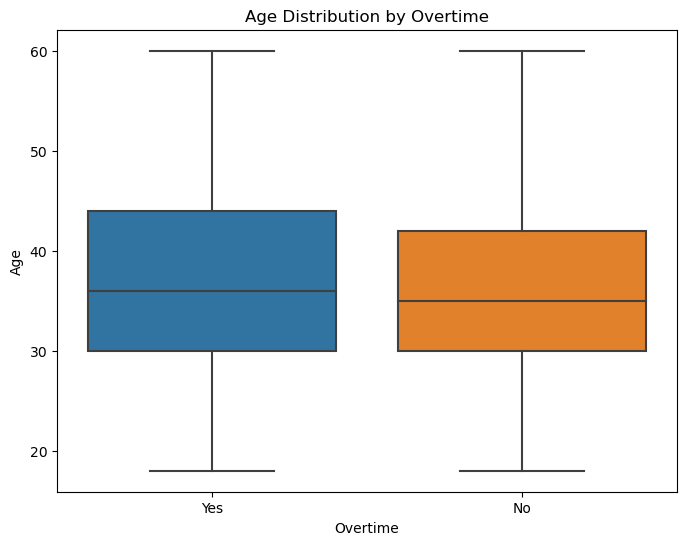

In [38]:
# Create a box plot to compare age distributions
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverTime', y='Age', data=hr)
plt.title('Age Distribution by Overtime')
plt.xlabel('Overtime')
plt.ylabel('Age')
plt.show()


In [39]:
# Calculate summary statistics for age by overtime
age_summary_by_overtime = hr.groupby('OverTime')['Age'].describe()
print(age_summary_by_overtime)

           count       mean       std   min   25%   50%   75%   max
OverTime                                                           
No        1054.0  36.762808  8.975894  18.0  30.0  35.0  42.0  60.0
Yes        416.0  37.331731  9.526402  18.0  30.0  36.0  44.0  60.0


In [41]:
from scipy import stats

# Separate the data into two groups: overtime and no overtime
age_overtime = hr[hr['OverTime'] == 'Yes']['Age']
age_no_overtime = hr[hr['OverTime'] == 'No']['Age']

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(age_overtime, age_no_overtime)

# Print the results
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_value}')

T-Statistic: 1.0756184531226642
P-Value: 0.28227467589630123


<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Total Working Years Status:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>Distribution</li>
  <li>Attrition</li>
</ul>

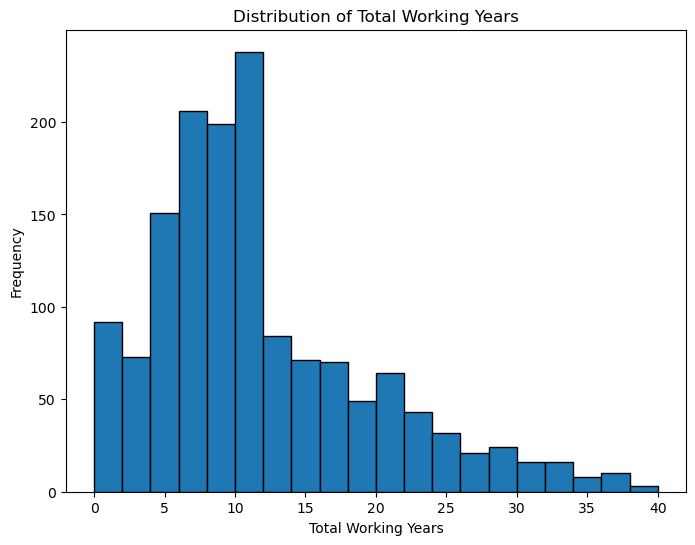

In [42]:
# Create a histogram to visualize the distribution of total working years
plt.figure(figsize=(8, 6))
plt.hist(hr['TotalWorkingYears'], bins=20, edgecolor='k')
plt.title('Distribution of Total Working Years')
plt.xlabel('Total Working Years')
plt.ylabel('Frequency')
plt.show()


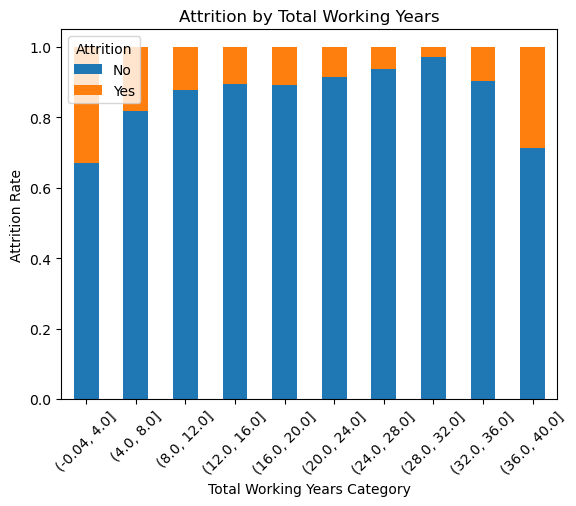

In [43]:
# Define the number of bins
num_bins = 10

# Create a new column for total working years category using a fixed number of bins
hr['TotalWorkingYearsCategory'] = pd.cut(hr['TotalWorkingYears'], bins=num_bins)

# Calculate attrition rates for each total working years category
attrition_by_working_years = hr.groupby('TotalWorkingYearsCategory')['Attrition'].value_counts(normalize=True).unstack()
attrition_by_working_years.plot(kind='bar', stacked=True, rot=45)
plt.title('Attrition by Total Working Years')
plt.xlabel('Total Working Years Category')
plt.ylabel('Attrition Rate')
plt.legend(title='Attrition', loc='upper left')
plt.show()

# Remove the added column to avoid confusion
hr.drop(columns=['TotalWorkingYearsCategory'], inplace=True)


<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Education Status:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>Distribution</li>
  <li>Average Monthly Income</li>
  <li>Job Role</li>
</ul>

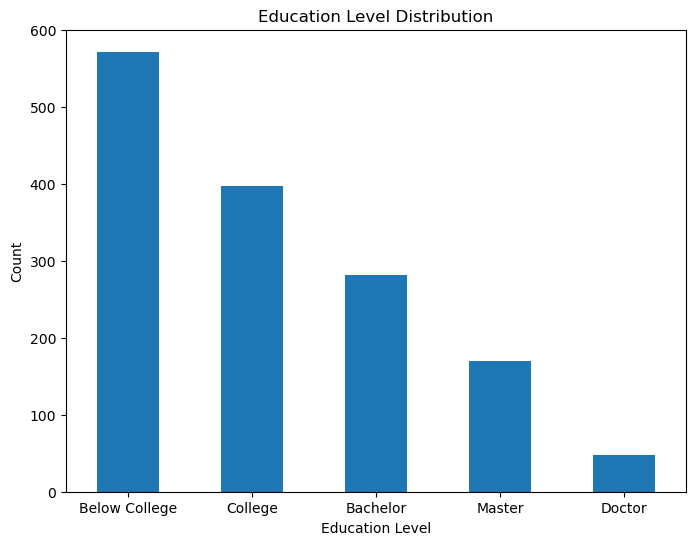

In [44]:
# Calculate the count and percentage of employees at each education level
education_counts = hr['Education'].value_counts()
education_percentage = hr['Education'].value_counts(normalize=True) * 100

# Create a bar chart to visualize the distribution
plt.figure(figsize=(8, 6))
education_counts.plot(kind='bar', rot=0)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(range(0, 5), ['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.show()


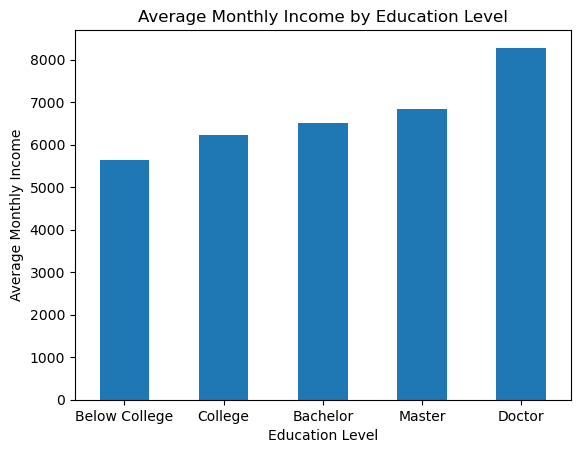

In [45]:
# Calculate average monthly income by education level
average_income_by_education = hr.groupby('Education')['MonthlyIncome'].mean()
average_income_by_education.plot(kind='bar', rot=0)
plt.title('Average Monthly Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Monthly Income')
plt.xticks(range(0, 5), ['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.show()


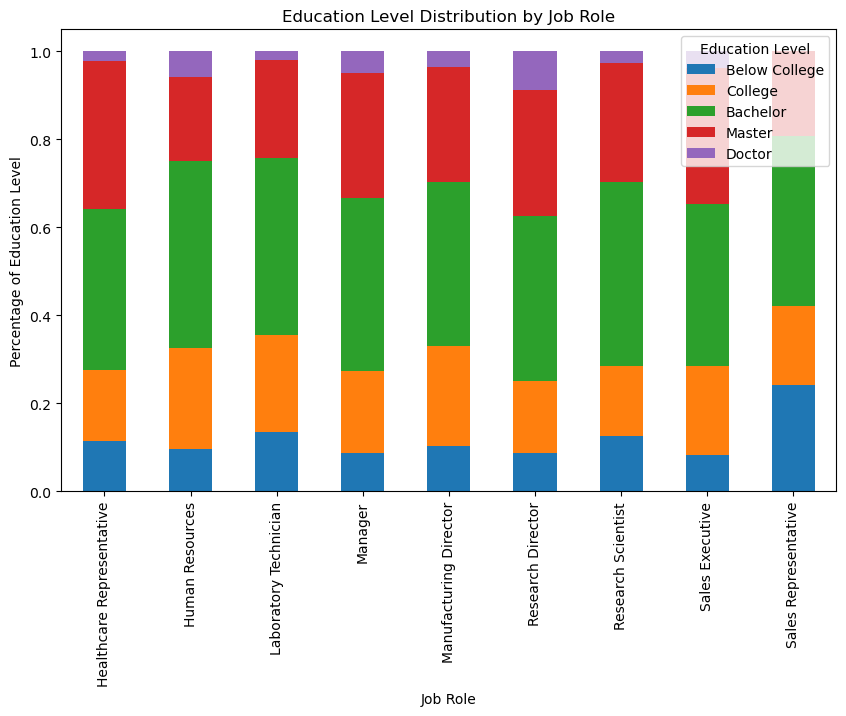

In [46]:
# Create a crosstab to analyze education levels by job role
education_job_crosstab = pd.crosstab(hr['JobRole'], hr['Education'], normalize='index')
education_job_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Education Level Distribution by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Percentage of Education Level')
plt.legend(title='Education Level', loc='upper right', labels=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.xticks(rotation=90)
plt.show()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Number of Companies Worked Status:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>Distribution</li>
  <li>Average Monthly Income</li>
  <li>Attrition</li>
</ul>

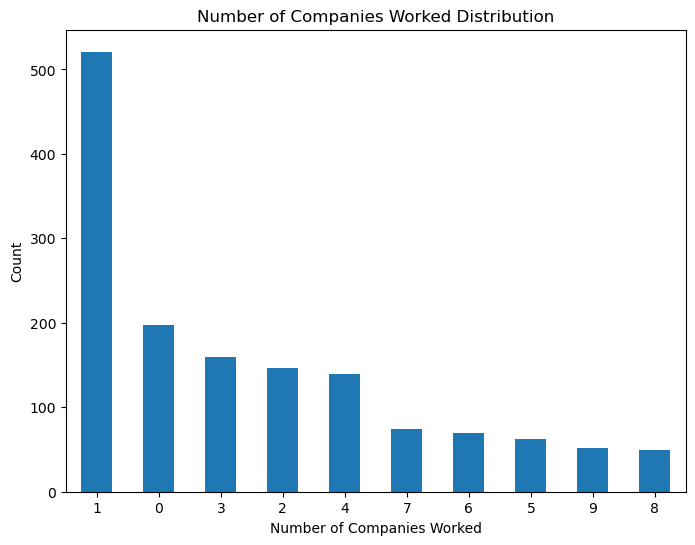

In [47]:
# Calculate the count and percentage of employees for each number of companies worked
companies_worked_counts = hr['NumCompaniesWorked'].value_counts()
companies_worked_percentage = hr['NumCompaniesWorked'].value_counts(normalize=True) * 100

# Create a bar chart to visualize the distribution
plt.figure(figsize=(8, 6))
companies_worked_counts.plot(kind='bar', rot=0)
plt.title('Number of Companies Worked Distribution')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Count')
plt.show()

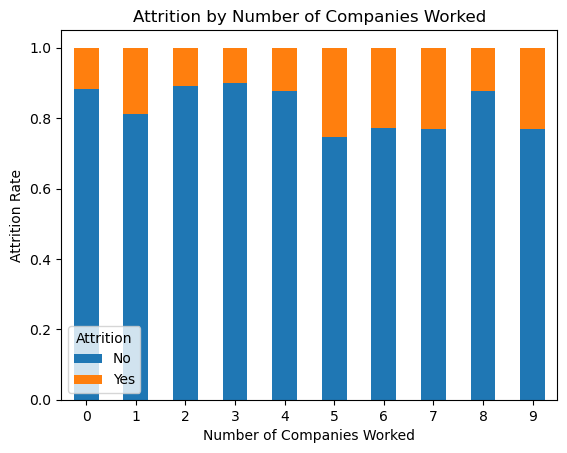

In [48]:
# Calculate attrition rates by the number of companies worked
attrition_by_companies_worked = hr.groupby('NumCompaniesWorked')['Attrition'].value_counts(normalize=True).unstack()
attrition_by_companies_worked.plot(kind='bar', stacked=True, rot=0)
plt.title('Attrition by Number of Companies Worked')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Attrition Rate')
plt.show()


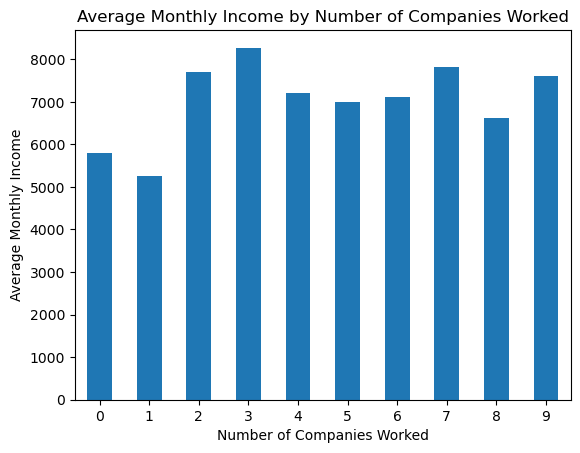

In [49]:
# Calculate average monthly income by the number of companies worked
average_income_by_companies_worked = hr.groupby('NumCompaniesWorked')['MonthlyIncome'].mean()
average_income_by_companies_worked.plot(kind='bar', rot=0)
plt.title('Average Monthly Income by Number of Companies Worked')
plt.xlabel('Number of Companies Worked')
plt.ylabel('Average Monthly Income')
plt.show()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Distance From Home Status:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>Distribution</li>
  <li>Job Role</li>
  <li>Attrition</li>
</ul>

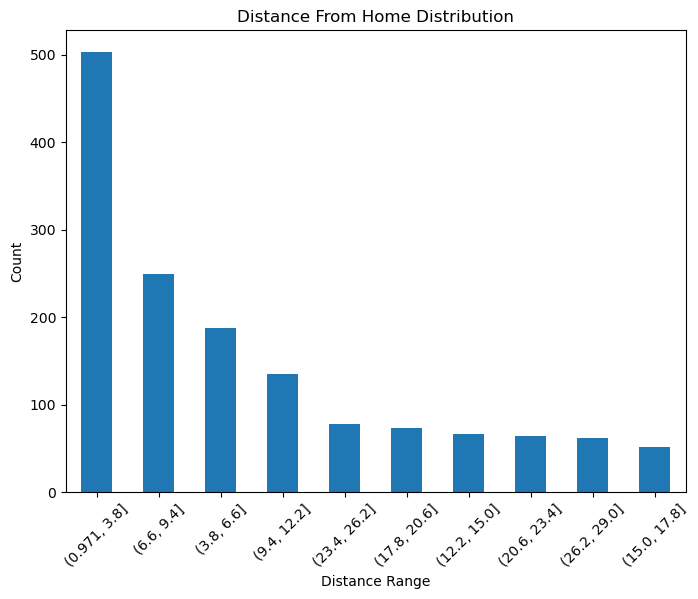

In [50]:
# Define the number of bins for distance ranges (you can adjust this based on your data)
num_bins = 10

# Calculate the count and percentage of employees for each distance range
distance_counts = pd.cut(hr['DistanceFromHome'], bins=num_bins, include_lowest=True).value_counts()
distance_percentage = distance_counts / len(hr) * 100

# Create a histogram to visualize the distribution
plt.figure(figsize=(8, 6))
distance_counts.plot(kind='bar', rot=0)
plt.title('Distance From Home Distribution')
plt.xlabel('Distance Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


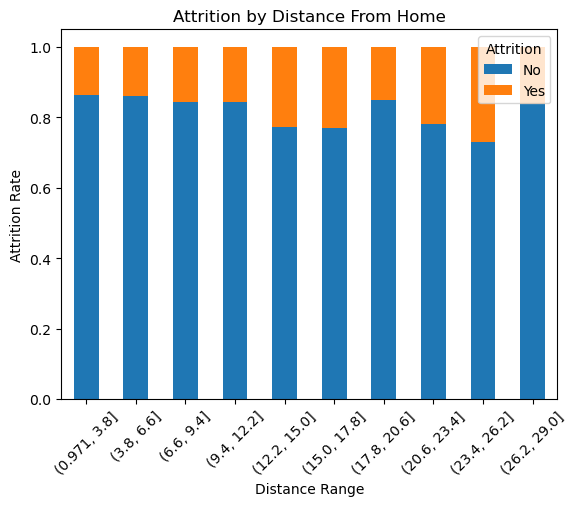

In [51]:
# Calculate attrition rates by distance range
attrition_by_distance = hr.groupby(pd.cut(hr['DistanceFromHome'], bins=num_bins, include_lowest=True))['Attrition'].value_counts(normalize=True).unstack()
attrition_by_distance.plot(kind='bar', stacked=True, rot=0)
plt.title('Attrition by Distance From Home')
plt.xlabel('Distance Range')
plt.ylabel('Attrition Rate')
plt.xticks(rotation=45)
plt.show()


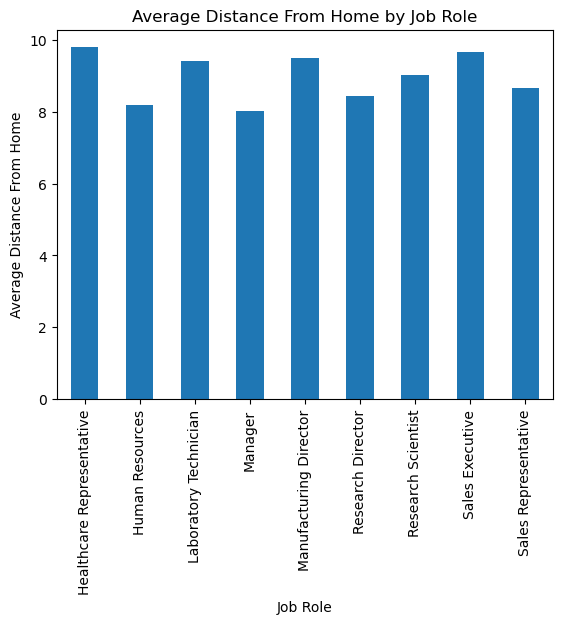

In [52]:
# Calculate average distance from home by job role
average_distance_by_role = hr.groupby('JobRole')['DistanceFromHome'].mean()
average_distance_by_role.plot(kind='bar', rot=45)
plt.title('Average Distance From Home by Job Role')
plt.xlabel('Job Role')
plt.ylabel('Average Distance From Home')
plt.xticks(rotation=90)
plt.show()


# Employee Attrition Analysis Report

## Introduction:
This data analysis report aims to provide insights into employee attrition within the organization. By examining various factors, including demographics, job-related variables, and overall work environment, the report seeks to assist stakeholders in understanding patterns and areas for improvement.

## Correlation Map:
- A correlation map for all numeric variables was generated, revealing significant relationships among various factors affecting employee attrition. Key correlated factors include Total Working Years, Monthly Income, and Job Level.

## Overtime:
### Attrition Rates by Overtime:
- Employees working overtime tend to have a higher attrition rate.
- 17% of employees working overtime experience attrition, compared to 12% for those not working overtime.
### Average Job Satisfaction by Overtime:
- Employees working overtime (2.77) have slightly higher average job satisfaction compared to those without overtime (2.71).

## Marital Status:
### Marital Status Distribution:
- Married: 45.78%
- Single: 31.97%
- Divorced: 22.24%
### Attrition by Marital Status:
- Single employees have the highest attrition rate (14.80%) compared to married employees (10.60%) and divorced employees (11.46%).

## Job Role:
### Attrition by Job Role:
- Sales Representatives (39.76%) and Laboratory Technicians (23.94%) exhibit higher attrition rates.
### Percentage of Workforce by Job Role:
- Sales Executives (22.18%) and Research Scientists (19.86%) constitute the largest portions of the workforce.

## Gender:
### Gender Distribution:
- Male: 60%
- Female: 40%
### Attrition by Gender:
- Attrition rates are comparable between genders, with males at 17.01% and females at 14.80%.

## Education Level:
### Education Level Distribution:
- Education Level 3 (38.91%) and Level 4 (27.07%) are most prevalent.
### Average Monthly Income by Education Level:
- Higher education levels correspond to higher average monthly incomes.

## Department:
### Attrition by Department:
- Research & Development has the highest attrition rate (15.47%).

## Business Travel:
### Attrition by Business Travel:
- Employees who travel frequently have a higher attrition rate (24.24%).

## Relation between Overtime and Age:
- Both groups, with and without overtime, have similar age distributions.
- No significant difference in age is observed between those working overtime and those who are not.

## Total Working Years:
### Attrition by Total Working Years:
- Employees with fewer working years tend to have higher attrition rates.

## Number of Companies Worked:
### Number of Companies Worked Distribution:
- Most employees have worked for one or fewer companies.
### Average Monthly Income by Number of Companies Worked:
- Employees who have worked for more companies tend to have higher average monthly incomes.

## Distance from Home:
### Distance from Home Distribution:
- Majority of employees have a distance from home between 0.971 and 3.8 miles.
### Attrition by Distance from Home:
- Employees with longer commutes (e.g., 23.4 to 26.2 miles) tend to have higher attrition rates.

## Conclusion:
This comprehensive analysis provides valuable insights into employee attrition patterns. Understanding these factors allows us to make informed decisions and implement targeted strategies to improve employee retention and satisfaction. The correlation map and specific insights for Overtime, Marital Status, Job Role, Gender, Education, Department, Business Travel, Age, Total Working Years, Number of Companies Worked, and Distance from Home are crucial for developing effective HR policies and addressing attrition challenges.